In [7]:
import pandas as pd
data_path = 'uservoice_sample.csv'
df_init = pd.read_csv(data_path)

In [8]:
import re

In [9]:
df_init.head()

,txt,txt_norm
0,"""Администратор, прошу опубликуйте! Дорогие р...","""весь также будущее по спикер дорогой ананян г..."
1,"""Почему я и мои мастера не выезжают ""посмотрет...","""заказ даже такой по ванна мастер современный ..."
2,"""16 March 2023, 23:43 Что происходит объяв...","""review всё личка такой допишешся написать 202..."
3,"""26 December, 2022 При поиске работы объяв...","""по при ранний невозможно december разработчик..."
4,"""09 February 2023, 10:25 Прошел проверку н...","""пройти review создать политика 2023 же is act..."


In [10]:
def islatin(sym):
    return sym>='a'and sym<='z'

In [11]:
def isdigit(sym):
    return sym>='0' and sym <='9'

In [12]:
isdigit('0')

True

In [13]:
df_init['txt'] = list(map(lambda x: str(x).lower(), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: x.replace('ё', 'е'), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: re.sub('\[[^)]*\]', '', x), list(df_init['txt'] )))
# records['txt_norm'] = list(map(lambda x: '"'+x+'"', list(records['txt_norm'] )))
df_init['txt'] = list(map(lambda x: x.encode('cp1251', errors='ignore').decode('cp1251'), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: x[1:len(x)-1], list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: "".join([w for w in x if not isdigit(w)]), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: "".join([w for w in x if not islatin(w)]), list(df_init['txt'] )))

In [14]:
df_init['txt_norm'] = list(map(lambda x: str(x).lower(), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: x.replace('ё', 'е'), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: re.sub('\[[^)]*\]', '', x), list(df_init['txt_norm'] )))
# records['txt_norm'] = list(map(lambda x: '"'+x+'"', list(records['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: x.encode('cp1251', errors='ignore').decode('cp1251'), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: x[1:len(x)-1], list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: "".join([w for w in x if not isdigit(w)]), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: "".join([w for w in x if not islatin(w)]), list(df_init['txt_norm'] )))

In [15]:
df_init['txt_norm']

0        весь также будущее по спикер дорогой ананян го...
1        заказ даже такой по ванна мастер современный п...
2         все личка такой допишешся написать  же продав...
3        по при ранний невозможно  разработчик  один оч...
4        пройти  создать политика  же   удалить   разны...
                               ...                        
22213    легализация   все отправка придумать недалекий...
22214     решить   оценить линия   поддержка  ваш вопро...
22215     по просить   поддержка разобраться миша реакц...
22216    сфера ведение по сеть звонить коммуникабельнос...
22217    невзламывать на друг вы не заблокировать кто н...
Name: txt_norm, Length: 22218, dtype: object

In [16]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

In [17]:
# inputs = tokenizer("шляпа-доставка! авито доставка:", return_tensors="pt")
# outputs = model(**inputs)

In [18]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')  # multi-language model

In [19]:
sentences = df_init['txt']
embedding = model.encode(sentences, convert_to_tensor=False)
embedding.shape

(22218, 384)

In [20]:
embedding

array([[ 0.02236579, -0.07478554, -0.06094347, ..., -0.02912958,
        -0.17586197,  0.03046287],
       [ 0.03791523,  0.05426043,  0.10739622, ...,  0.05990028,
        -0.11676306, -0.10961503],
       [ 0.01612015,  0.06466454, -0.07763744, ..., -0.05076247,
         0.04882237,  0.05972154],
       ...,
       [-0.24115212,  0.10204361, -0.01274201, ...,  0.06595826,
        -0.15719214,  0.09643795],
       [ 0.00407208,  0.10857359,  0.15204513, ...,  0.0396923 ,
        -0.1384075 ,  0.20356297],
       [-0.14606604,  0.07120281,  0.19343151, ...,  0.08865872,
        -0.15563424,  0.0290323 ]], dtype=float32)

Очистка от повторяющихся супер похожих спамных и рекламных объявлений с помощью dbscan

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [22]:
logs = []
epsilon = 0.5
for i in range(11):
    print(epsilon)
    
    dbscan = DBSCAN(eps=epsilon)
    dbscan.fit(embedding)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    
  
    elements_in_class = list(map(lambda i: sum(1 for ind in dbscan.labels_ if ind == i), set(dbscan.labels_)))[:-1]
    mean_elements_in_class = np.mean(elements_in_class)

    print('Mean number of elements in class: %0.3f' % mean_elements_in_class)
    print('Max number of elements in class: %0.3f' % np.max(elements_in_class))
    print('Min number of elements in class: %0.3f' % np.min(elements_in_class))
    
    sil = silhouette_score(embedding, labels)
    print("Silhouette Coefficient: %0.3f" % sil)
    
    print('================================')
    
    logs.append([epsilon, n_clusters_, n_noise_, mean_elements_in_class, np.max(elements_in_class), np.min(elements_in_class), sil])
    
    
    epsilon+=0.2

0.5
Estimated number of clusters: 36
Estimated number of noise points: 21583
Mean number of elements in class: 17.639
Max number of elements in class: 161.000
Min number of elements in class: 5.000
Silhouette Coefficient: -0.183
0.7
Estimated number of clusters: 47
Estimated number of noise points: 21405
Mean number of elements in class: 17.298
Max number of elements in class: 187.000
Min number of elements in class: 5.000
Silhouette Coefficient: -0.193
0.8999999999999999
Estimated number of clusters: 52
Estimated number of noise points: 21161
Mean number of elements in class: 20.327
Max number of elements in class: 189.000
Min number of elements in class: 4.000
Silhouette Coefficient: -0.193
1.0999999999999999
Estimated number of clusters: 55
Estimated number of noise points: 20905
Mean number of elements in class: 23.873
Max number of elements in class: 225.000
Min number of elements in class: 5.000
Silhouette Coefficient: -0.207
1.2999999999999998
Estimated number of clusters: 62
Es

In [23]:
log_df = pd.DataFrame(logs, columns = ['eps', 'n_clusters', 'n_noise_points', 'mean n_elements', 'max n_elements','min n_elements', 'silhouette'])

In [24]:
log_df

,eps,n_clusters,n_noise_points,mean n_elements,max n_elements,min n_elements,silhouette
0,0.5,36,21583,17.638889,161,5,-0.183392
1,0.7,47,21405,17.297872,187,5,-0.193278
2,0.9,52,21161,20.326923,189,4,-0.193371
3,1.1,55,20905,23.872727,225,5,-0.206917
4,1.3,62,20466,28.258065,311,5,-0.192878
5,1.5,88,19776,27.750000,391,5,-0.206018
6,1.7,105,16871,50.923810,3802,2,-0.211542
7,1.9,52,10553,224.326923,11167,3,-0.143609
8,2.1,16,5056,1072.625000,17018,3,-0.053443
9,2.3,6,1974,3374.000000,20211,4,0.017535


In [25]:
dbscan = DBSCAN(eps=1.5)
dbscan.fit(embedding)

DBSCAN(eps=1.5)

In [26]:
elements_in_class = list(map(lambda i: sum(1 for ind in dbscan.labels_ if ind == i), set(dbscan.labels_)))[:-1]
np.argmax(elements_in_class)

8

In [27]:
list(sentences[[i == 8 for i in dbscan.labels_]])[2]

'здравствуйте! уже писала в поддержку, но мне так никто и не ответил, хотя прошло уже недели .\n\nвопрос . я оплатила платное размещение до -х объявлений, не успела ими воспользоваться, как мой профиль заблокировали. авито пишет: "профиль заблокирован навсегда. вы нарушили правила использования авито." как мне вернуть деньги?\n\nпочта, под которой был зарегистрирован этот аккаунт - _@.\n\nи номер телефона \n\nвопрос . я наверное не понимаю до конца правила авито. я удалила свой старый профиль на авито и затем создала новый, под новой почтой и номером телефона. закинула документы на проверку, выложила одно объявление и мой профиль в тут же заблокировали. по какой причине? я больше не смогу зарегистрироваться на авито?'

In [28]:
# import numpy as np
# from sklearn import metrics


# labels = dbscan.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)

# mean_elements_in_class = np.mean(list(map(lambda i: sum(1 for ind in dbscan.labels_ if ind == i), set(dbscan.labels_)))[:-1])

# print('Mean number of elements in class: %0.3f' % mean_elements_in_class)

In [29]:
# for i, ind in enumerate(dbscan.core_sample_indices_):
#     print([sentences[ind], dbscan.labels_[ind]])

In [30]:
df_init = df_init[[i == -1 for i in dbscan.labels_]]

In [31]:
df_init.reset_index(inplace=True, drop=True)

In [32]:
df_init

,txt,txt_norm
0,"почему я и мои мастера не выезжают ""посмотреть...",заказ даже такой по ванна мастер современный п...
1,", при поиске работы объявления идут спис...",по при ранний невозможно разработчик один оч...
2,", : прошел проверку на двух аккаунтах с ...",пройти создать политика же удалить разны...
3,"добрый день! возможно ли такое, что работа про...",такой по столько просмотр минимум человек б...
4,продолжаю тему помощи частной передержке в маг...,перетаскать около по дорогой согласиться сгр...
...,...,...
19771,", приложение не работает, сообщения и пр...",заказ придумать сообщение у выдавать я нераб...
19772,", : карта местности стала коряво стала р...",бесполезно показываться работать стать ...
19773,здравствуйте еще в пятницу заблокировали профи...,по просить поддержка разобраться миша реакц...
19774,описание работодателя: требуется менеджер по п...,сфера ведение по сеть звонить коммуникабельнос...


In [33]:
sentences = sentences[[i == -1 for i in dbscan.labels_]]

In [34]:
embedding = embedding[[i == -1 for i in dbscan.labels_]]

In [35]:
sentences.reset_index(inplace=True, drop=True)
sentences

0        почему я и мои мастера не выезжают "посмотреть...
1         ,      при поиске работы объявления идут спис...
2          , :     прошел проверку на двух аккаунтах с ...
3        добрый день! возможно ли такое, что работа про...
4        продолжаю тему помощи частной передержке в маг...
                               ...                        
19771     ,      приложение не работает, сообщения и пр...
19772      , :     карта местности стала коряво стала р...
19773    здравствуйте еще в пятницу заблокировали профи...
19774    описание работодателя: требуется менеджер по п...
19775    не кто меня не взламывал как вы не поймете это...
Name: txt, Length: 19776, dtype: object

In [36]:
len(embedding)

19776

In [37]:
!pip install scikit-learn-extra

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn_extra.cluster import KMedoids
kmeans_kwargs = {
     "init": "random",
     #"n_init": 3 ,
     "max_iter": 1000,
     "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
silhouette_coefficients = []

for k in range(2, 21):
    kmeans = KMedoids(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(embedding)
    sse.append(kmeans.inertia_)
    score = silhouette_score(embedding, kmeans.labels_)
    silhouette_coefficients.append(score)
    

Elbow point at 7 clusters


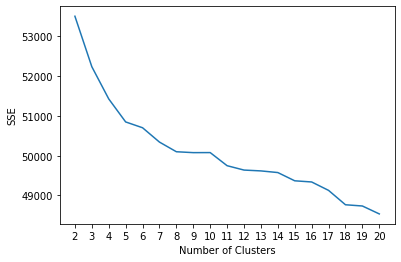

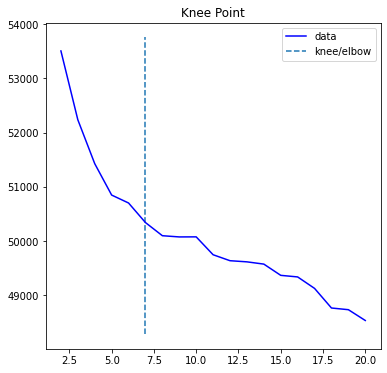

In [85]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

kl = KneeLocator(
range(2, 21), sse, curve="convex", direction="decreasing"
)

print('Elbow point at ' + str(kl.elbow) + ' clusters')
plt.plot(range(2, 21), sse)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl.plot_knee()

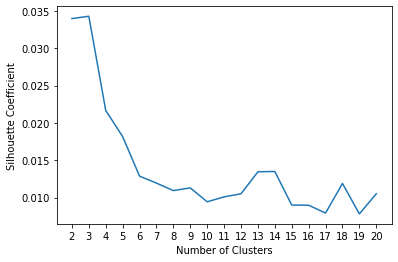

In [86]:
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [65]:
final_model = KMedoids(
    init="random",
    n_clusters=14,
    #n_init=20,
    max_iter=1000,
    random_state=42
    )

final_model.fit(embedding)

KMedoids(init='random', max_iter=1000, n_clusters=14, random_state=42)

In [66]:
sentences[0]
final_model.labels_[0]

4

In [43]:
# for i,key in enumerate(list(final_model.labels_)):
#     if(key == 6):
#         print(i)
#         print(sentences[i])
#         print('--------------')

In [44]:
# [np.linalg.norm(centroids[0]-e) for e in embedding]

In [67]:
centroids = final_model.cluster_centers_
for i, center in enumerate(centroids):
    print(i)
    ind = np.argmin([np.linalg.norm(center-e) for e in embedding])
    print(sentences[ind])
    print('===========')

0
 ,      раньше больше нравилось, а сейчас часто тормозит. плюс бесит политика компании: удалил или снял объявление - нет, оно еще  дней провисит, чтобы люди не могли бесплатно разместить новое в этой категории! честно бред какой-то, на рекламе что ли мало зарабатывали? количество бесплатных объявлений все уменьшается, но я из принципа платно не стану размещать! также бесит, что много бестолковых или шуточных объяв висит, почему такие дают размещать, они только засоряют сайт еще больше! модеры, ау!      
1
«реальный покупатель квартиры обходится в  »: как риелторы используют рассылку скидок на авито.   источник: авито.   в декабре  года на авито появилась новая услуга — «рассылка скидок». читайте истории тех, кто уже продал с ее помощью несколько объектов. опытные риелторы делятся стратегиями и подсказывают, как лучше использовать услугу, чтобы увеличить количество и скорость продаж.    статья написана в апреле  года.    «за два месяца рассылка скидок помогла продать пять квартир, а к

In [68]:
sentence_labels = []
for i in range(len(sentences)):
    sentence_labels.append([sentences[i], df_init['txt_norm'][i], embedding[i], final_model.labels_[i]])

In [69]:
sentence_labels_df = pd.DataFrame(sentence_labels, columns = ['sentence', 'norm_sent' ,'embedding', 'cluster_index'])
sentence_labels_df[20:30]

,sentence,norm_sent,embedding,cluster_index
20,", : фото приложение не грузит фото. п...",листать мера приложение тупить ле...,"[-0.109888576, 0.1504324, 0.06485387, 0.112482...",3
21,здравствуйте. не получается дозвониться в вашу...,техподдержка личка снимать так именно комната ...,"[0.03623296, 0.11120635, -0.004689417, 0.01773...",10
22,исправите уже наконец поиск - объявления в нов...,пройти иркутск по наконец при исправить город ...,"[0.14883022, -0.26735553, -0.0017146841, -0.05...",6
23,тема: \nвремя: .. в : (+) \nсобытие: пришло с...,техподдержка мама время дорогой так же тема ...,"[0.17632805, 0.043457706, -0.08745389, -0.0093...",1
24,"здравствуйте, у моего мужа заблокировался акка...",заказ появиться отправить муж подтверждение р...,"[0.03900304, 0.122995794, -0.2770392, -0.03525...",8
25,здравствуйте! рассмотрите пожалуйста возможнос...,пожалуйста избранный категория вернуть спасибо...,"[-0.09553714, 0.020552745, 0.12987073, 0.12687...",4
26,"кто желает писать отзывы авито по рублей, янд...",отзыв по желать яндекс присоединяться писать...,"[-0.28169742, -0.19663589, -0.05729916, -0.071...",4
27,", вылетает учетная запись. много раз пи...",убрать служба все шаблонный превью просмотр ...,"[-0.17101805, -0.25781098, -0.06797808, -0.168...",5
28,в энгельсе продают любвеобильных енотов на с...,дрессировка область дальнейший пользователь по...,"[0.12095468, -0.13496637, -0.07953863, 0.10459...",13
29,"новый вебинар по все более актуальной теме: ""к...",весь казино рамка по сеть чат тема жертва форм...,"[0.039175633, -0.093492985, -0.09094879, -0.10...",12


In [70]:
{label: dict() for label in list(set(final_model.labels_))}

{0: {},
 1: {},
 2: {},
 3: {},
 4: {},
 5: {},
 6: {},
 7: {},
 8: {},
 9: {},
 10: {},
 11: {},
 12: {},
 13: {}}

In [49]:
stopw = ['такой','свой','мой', 'ваш', 'какой', 'уже', 'тот', 'нет', 'быть', 'cам', 'один', 'вообще', 'стать', 'очень', 'который', 'там', 'раз', 'каждый', 'какой', 'че', 'наш', 'весь', 'есть','этот']

In [50]:
print('весь' in stopw)

True


In [71]:
import pymorphy2
def getfreq(sentence_labels_df, final_model):
    morph = pymorphy2.MorphAnalyzer()
    labels = final_model.labels_
    freq_dict = {label: dict() for label in list(set(labels))}
    for i, sent in enumerate(sentence_labels_df['norm_sent']):
        sent = set(sent.split(' '))
        for word in sent:
            w = morph.parse(word)[0]
            if (not w.tag.POS in ('PREP', 'PRCL', 'CONJ', 'NPRO', 'INTJ',  None)) and (not word in stopw):
                cluster_index = sentence_labels_df['cluster_index'][i]
                if word in freq_dict[cluster_index].keys():
                    freq_dict[cluster_index][word]+=1
                else:
                    freq_dict[cluster_index][word]=1 
    return freq_dict

In [72]:
freq_dict = getfreq(sentence_labels_df,final_model)

In [73]:
def printtopN(freq_dict, N, final_model):
    for tag in list(set(final_model.labels_)):
        print(tag)
        for w in sorted(freq_dict[tag], key=freq_dict[tag].get, reverse=True)[:N]:
            print(w, freq_dict[tag][w])
        print('=============')

In [74]:
printtopN(freq_dict, 10, final_model)

0
объявление 524
реклама 350
авить 237
деньга 198
размещение 147
товар 141
приложение 136
большой 123
сайт 119
услуга 118
1
авить 1015
год 435
объявление 429
работа 417
квартира 388
продажа 388
цена 347
день 299
новый 297
мочь 265
2
отзыв 147
авить 146
сообщение 140
продавец 132
объявление 129
уведомление 93
человек 93
покупатель 92
писать 89
поддержка 88
3
авить 589
объявление 548
номер 479
телефон 373
писать 236
деньга 232
день 232
приложение 218
немочь 205
доставка 190
4
авить 1456
день 423
мочь 396
можно 385
доставка 375
видео 340
объявление 333
фото 316
еще 310
искать 293
5
приложение 1298
объявление 655
авить 485
обновление 390
работать 327
поддержка 275
день 245
только 236
писать 229
сообщение 227
6
объявление 762
авить 403
приложение 395
уведомление 217
поиск 190
только 173
другой 168
город 144
мошенник 144
работать 140
7
деньга 474
авить 349
доставка 337
товар 298
карта 204
заказ 183
день 165
покупатель 157
оплатить 144
продавец 140
8
заблокировать 1423
профиль 1374
аккаунт 13

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

def build_corpus(freq_dict, final_model):
    corpus = []
    for tag in list(set(final_model.labels_)):
        tag_str = ' '.join(list(map(lambda x: (x+' ')*freq_dict[tag][x],freq_dict[tag].keys())))
        corpus.append(tag_str)
    return corpus

In [76]:
corpus = build_corpus(freq_dict, final_model)

In [77]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index = list(set(final_model.labels_)))
tfidf_df 

,аааааа,ааааааа,ааааааааааааа,ааааааанглийский,ааитодоставка,аакаунт,аант,аарон,аато,аба,...,яха,яхина,яхрома,яхта,яхтенный,ячейка,яшин,яшноустресс,ящик,яяять
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001143,0.000000
1,0.000000,0.000000,0.000000,0.001139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.001139,0.000000,0.001972,0.000000,0.000793,0.000000,0.000000,0.001387,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001837,0.001837,0.000000,0.000000,0.000000,0.001590,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.003675,0.000000,0.001837,0.000000,0.000000,0.000000,0.001491,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.001833,0.000000,0.001059,0.000000,0.001833,...,0.00000,0.000000,0.000000,0.000917,0.000000,0.000000,0.000000,0.001059,0.004726,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001294,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000525,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.002763,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.001923,0.000000,0.000000,0.001121,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001304,0.000643
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001424,0.000000


In [78]:
def printtopNTFIDF(freq_dict,N, final_model):
    for tag in list(set(final_model.labels_)):
        print(tag)
        for i in sorted(tfidf_df.loc[tag].index, key = tfidf_df.loc[tag].get, reverse=True)[:N]:
            print(i, tfidf_df.loc[tag][i])
        print("======")

In [79]:
printtopNTFIDF(freq_dict, 10, final_model)

0
объявление 0.489513474437228
реклама 0.3269651069714309
авить 0.22140208672065465
деньга 0.18496883194383804
размещение 0.13732534492800097
приложение 0.13581479464722923
товар 0.13172022880849074
большой 0.11490488044996
сайт 0.11116813637028651
платный 0.11023395035036813
1
авить 0.38352979091905864
год 0.16436991039388227
объявление 0.16210273921603563
работа 0.15756839686034232
квартира 0.1466104028340835
продажа 0.1466104028340835
цена 0.13111806645213137
день 0.11298069702935816
новый 0.11222497330340928
недвижимость 0.10502222586087902
2
отзыв 0.26663551898109855
авить 0.26482167191319994
сообщение 0.25393858950580817
продавец 0.2394278129626191
объявление 0.23398627175892323
уведомление 0.18032603145625634
человек 0.16868777731457257
покупатель 0.16687393024667393
писать 0.16143238904297805
поддержка 0.1596185419750794
3
авить 0.3589393175879241
объявление 0.3339537284179667
номер 0.29190481005877017
телефон 0.22730792098522187
писать 0.14381948888073018
приложение 0.14201592

In [60]:
# df2 = pd.DataFrame(list(final_model.labels_))
# df2 = df2.rename(columns={0: "cluster_index"})
# df2

# df_final = pd.concat([df_init, df2], sort=False, axis = 1)
# df_final['cluster_index'] +=1
# df_final.head()

# indexes = df_final['cluster_index']

# indexes = pd.get_dummies(indexes)
# for ind in range(num_cluster):
#     indexes = indexes.rename(columns={ind: f"is_in_cluster_{ind}"})
# # indexes = indexes.rename(columns={1: "is_in_cluster_1", 2: "is_in_cluster_2"})

# df_binary_feature = pd.concat([df_final, indexes], sort=False, axis = 1)
# df_binary_feature.head()

In [80]:
df_init.to_csv('df_after_dbscan_medoids.csv')

In [81]:
df_embedding = pd.DataFrame(columns = ['sentence', 'embedding', 'cluster_index'])
df_embedding['sentence'] = list(sentences)
df_embedding['embedding'] = list(embedding)
df_embedding['cluster_index']=list(sentence_labels_df['cluster_index'])

In [63]:
df_embedding.to_csv('df_after_dbscan_medoids.csv')

KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
from sklearn import decomposition

In [89]:
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
from sklearn import decomposition

In [87]:
features_matrix = []
for tensor in embedding:
    features_matrix.append([float(elem) for elem in tensor])

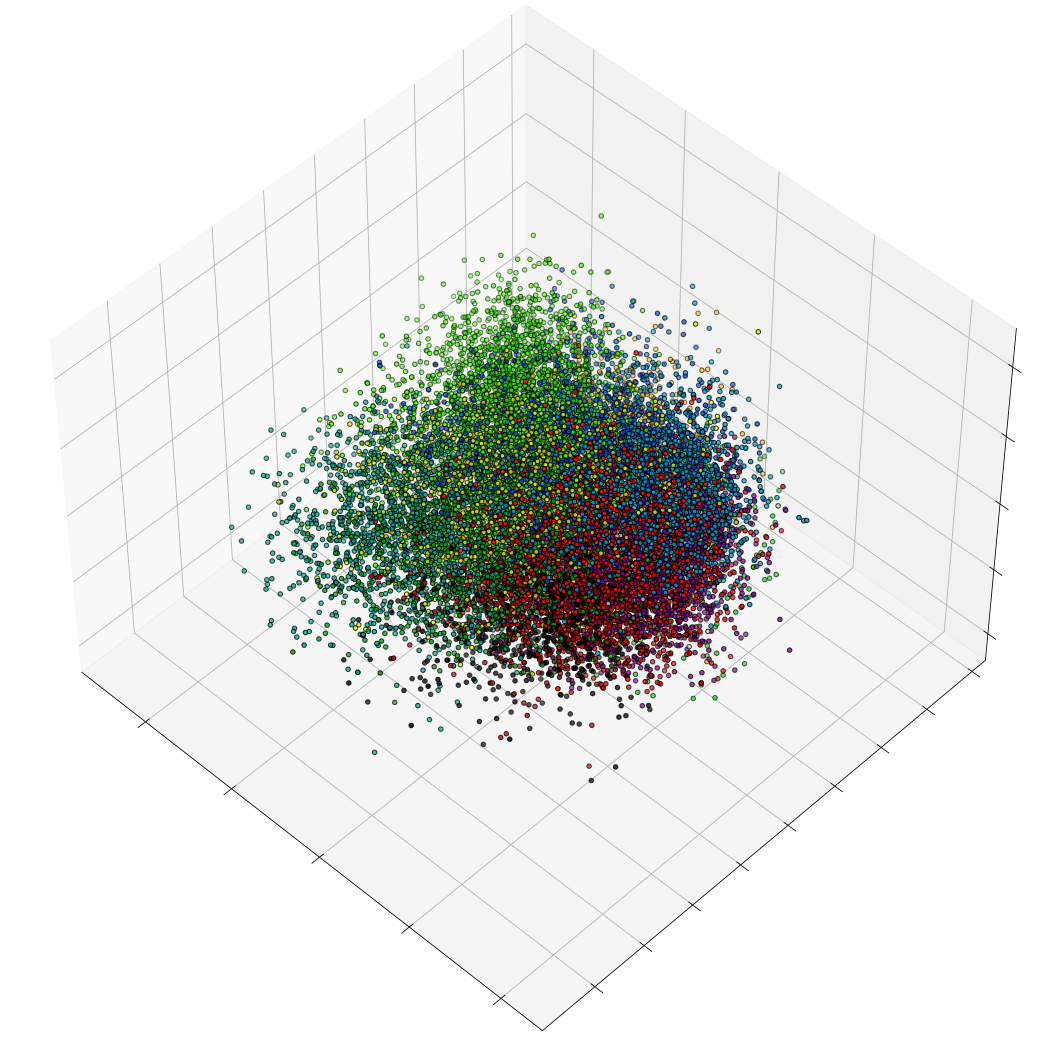

In [92]:
fig = plt.figure(1, figsize=(15, 15))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(features_matrix)
X = pca.transform(features_matrix)

# Reorder the labels to have colors matching the cluster results
y = df_embedding['cluster_index']
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()


In [102]:
cmap = plt.cm.nipy_spectral
cmap(3)

(0.10981176470588236, 0.0, 0.12548235294117646, 1.0)

In [104]:
pip install mycolorpy

  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3873 sha256=f21b7aca52c47cd9b7b5a8cbaa21cfb973749906dc687435ca145256866f389b
  Stored in directory: /home/agsheveleva/.cache/pip/wheels/81/b6/72/93c82344678b8c6489558fba31f71c7daf2ecf83956252b75a
Successfully built mycolorpy
Note: you may need to restart the kernel to use updated packages.


In [105]:
from mycolorpy import colorlist as mcp

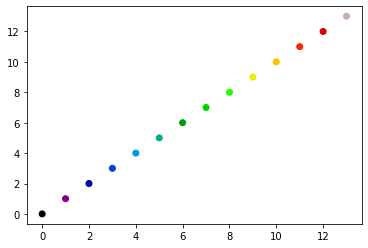

In [111]:
from mycolorpy import colorlist as mcp
color1=mcp.gen_color_normalized(cmap='nipy_spectral',data_arr=range(14))
plt.scatter(range(14),range(14),c=color1)